In [1]:
#All Data
allData=[]
dataPath=r'Bank(N)_v2.csv'
import csv
with open(dataPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     allData.append(r)
#Feature Label
feature=[]
#Pure Data
pureData=[]
for r in range(0,len(allData)):
    #Row Data
    rowData=[]
    for c in range(0,len(allData[r])):
        rowData.append(allData[r][c])
    if(r==0):
        feature=rowData
    else:
        pureData.append(rowData)
X=[]
y=[]
for r in range(0,len(pureData)):
    #Row Data
    rowData=[]
    for c in range(0,len(pureData[r])-1):
        rowData.append(float(pureData[r][c]))
    X.append(rowData)
    y.append(float(pureData[r][len(pureData[r])-1])/1000)
#Scale
scale=0.3
from sklearn.model_selection import train_test_split
#訓練集(Feature),測試集(Feature),訓練集(Class),測試集(Class)
Xtrain, Xtest, ytrain, ytest =train_test_split(X, y, test_size=scale)

訓練準確率:  0.9779516052282634
測試準確率:  0.965648111156427
MSE:  0.104093682456907
RMSE:  0.3226355257204436
MAPE:  0.07906212263332026


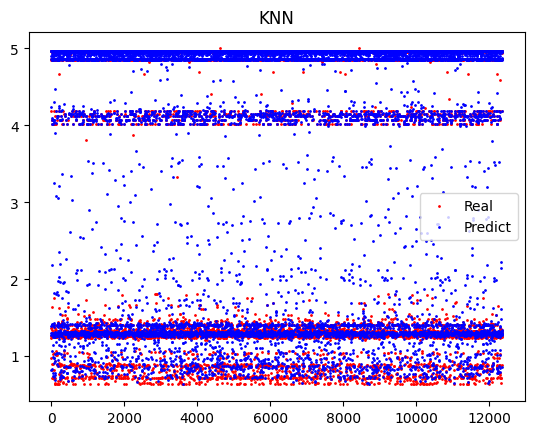

In [2]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor()
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(ytest, ypred)
rmse=math.sqrt(mse)
mape=mean_absolute_percentage_error(ytest, ypred)
print("訓練準確率: ",model.score(Xtrain, ytrain))
print("測試準確率: ",model.score(Xtest, ytest))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAPE: ", mape)
import matplotlib.pyplot as plt 
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, label="Real",color="red",s=1)
plt.scatter(x_ax, ypred, label="Predict",color="blue",s=1)
plt.title("KNN")
plt.legend()
plt.show()